In [1]:
# -*- coding: utf-8 -*-
import os, math, random, re, cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import shapely.wkt
from osgeo import ogr
from shapely.geometry import Polygon, MultiPolygon, LineString, MultiLineString, Point, MultiPoint, LinearRing
from tqdm import tqdm_notebook
%matplotlib inline

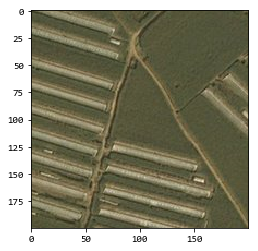

In [2]:
dapeng_ensure = cv2.imread("dapeng_pred_mask.png", cv2.IMREAD_GRAYSCALE)
dapeng_ensure_bgr = cv2.imread("dapeng_train_mask.png")
mask = cv2.inRange(dapeng_ensure_bgr, np.array([0,0,0]), np.array([254, 254, 254]))
dapeng_ensure = cv2.bitwise_and(dapeng_ensure, dapeng_ensure, mask=mask)
dapeng = cv2.imread("dapeng_pred.png")[:dapeng_ensure.shape[0], :dapeng_ensure.shape[1]]
partial_vision = (slice(1000, 1200), slice(3200, 3400))
plt.imshow(cv2.cvtColor(dapeng[partial_vision], cv2.COLOR_BGR2RGB))

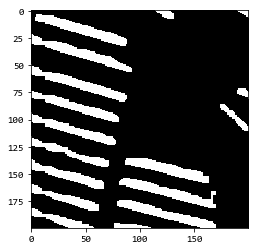

In [3]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(dapeng_ensure)
threshold, mask = cv2.threshold(clahe, 120, 255, cv2.THRESH_BINARY)
threshold, mask = cv2.threshold(mask, 120, 255, cv2.THRESH_OTSU)
kernel = np.ones((2, 2), np.uint8)
open = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=5)
close = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel, iterations=5)
erosion = cv2.erode(close, kernel, iterations=2)
plt.imshow(erosion[partial_vision], cmap="gray")

In [4]:
_, dilation_contours, _ = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
dapeng_copy = dapeng.copy()
_ = cv2.drawContours(dapeng_copy, dilation_contours, -1, (0, 0, 255), cv2.FILLED)

In [6]:
cv2.imwrite("dapeng_copy___.png", dapeng_copy)

True

In [7]:
dapeng_copy.shape

(3680, 5440, 3)

In [8]:
dapeng_ensure.shape

(3680, 5440)

In [9]:
len(dilation_contours)

2019